## Data Preprocessing
- Feature Engineering
- Data Exploration
- Resampling with SMOTETomek

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
train = pd.read_csv('train.csv')

In [4]:
test = pd.read_csv('test.csv')

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
# 查看数据类型
print("训练集数据类型:")
print(train.dtypes)

# 更详细的信息
print("\n训练集信息:")
print(train.info())

# 统计不同数据类型的列数
print("\n数据类型统计:")
print(train.dtypes.value_counts())

训练集数据类型:
id                  int64
target              int64
ps_ind_01           int64
ps_ind_02_cat       int64
ps_ind_03           int64
ps_ind_04_cat       int64
ps_ind_05_cat       int64
ps_ind_06_bin       int64
ps_ind_07_bin       int64
ps_ind_08_bin       int64
ps_ind_09_bin       int64
ps_ind_10_bin       int64
ps_ind_11_bin       int64
ps_ind_12_bin       int64
ps_ind_13_bin       int64
ps_ind_14           int64
ps_ind_15           int64
ps_ind_16_bin       int64
ps_ind_17_bin       int64
ps_ind_18_bin       int64
ps_reg_01         float64
ps_reg_02         float64
ps_reg_03         float64
ps_car_01_cat       int64
ps_car_02_cat       int64
ps_car_03_cat       int64
ps_car_04_cat       int64
ps_car_05_cat       int64
ps_car_06_cat       int64
ps_car_07_cat       int64
ps_car_08_cat       int64
ps_car_09_cat       int64
ps_car_10_cat       int64
ps_car_11_cat       int64
ps_car_11           int64
ps_car_12         float64
ps_car_13         float64
ps_car_14         float64
ps_

In [7]:
train.head(10)

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0
5,19,0,5,1,4,0,0,0,0,0,...,4,2,0,9,0,1,0,1,1,1
6,20,0,2,1,3,1,0,0,1,0,...,3,0,0,10,0,1,0,0,1,0
7,22,0,5,1,4,0,0,1,0,0,...,7,1,3,6,1,0,1,0,1,0
8,26,0,5,1,3,1,0,0,0,1,...,4,2,1,5,0,1,0,0,0,1
9,28,1,1,1,2,0,0,0,1,0,...,3,5,0,6,0,1,0,0,1,0


Target分布:
target
0    573518
1     21694
Name: count, dtype: int64

Target比例:
target
0    0.963552
1    0.036448
Name: proportion, dtype: float64


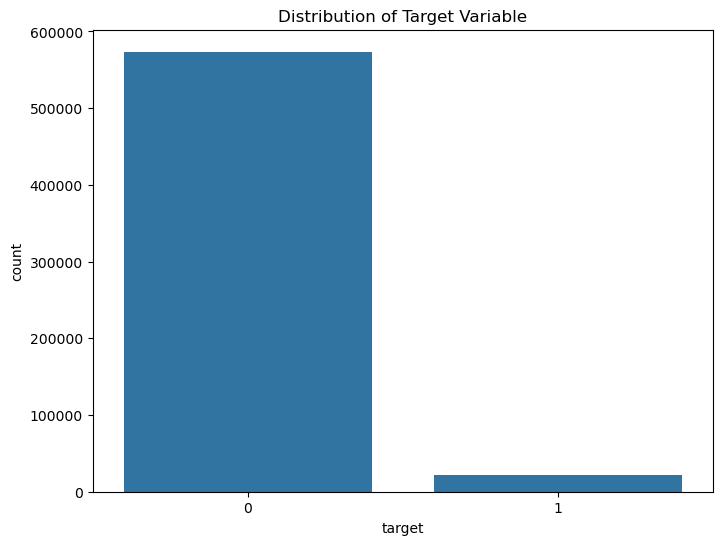

In [8]:
# 查看target的分布
print("Target分布:")
print(train['target'].value_counts())
print("\nTarget比例:")
print(train['target'].value_counts(normalize=True))

# 可视化
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
sns.countplot(data=train, x='target')
plt.title('Distribution of Target Variable')
plt.show()

In [9]:
# 导入需要的包
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler 
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTETomek
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 检查缺失值
print("缺失值统计:")
print(train.isnull().sum())

# 分离特征和目标变量
X = train.drop(['id', 'target'], axis=1)
y = train['target']

# 分割训练测试集
X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size=0.2, random_state=42, stratify=y
)

# 分离特征类型
cat_features = [col for col in X.columns if '_cat' in col]
bin_features = [col for col in X.columns if '_bin' in col]
num_features = [col for col in X.columns if ('_reg_' in col or '_calc_' in col) and 'bin' not in col]

# 对分类特征编码
encoders = {}
for col in cat_features:
   le = LabelEncoder()
   X_train[col] = le.fit_transform(X_train[col])
   X_test[col] = le.transform(X_test[col])
   encoders[col] = le

# 对数值特征标准化
scaler = StandardScaler()
X_train[num_features] = scaler.fit_transform(X_train[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])

缺失值统计:
id                0
target            0
ps_ind_01         0
ps_ind_02_cat     0
ps_ind_03         0
ps_ind_04_cat     0
ps_ind_05_cat     0
ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_10_bin     0
ps_ind_11_bin     0
ps_ind_12_bin     0
ps_ind_13_bin     0
ps_ind_14         0
ps_ind_15         0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0
ps_reg_01         0
ps_reg_02         0
ps_reg_03         0
ps_car_01_cat     0
ps_car_02_cat     0
ps_car_03_cat     0
ps_car_04_cat     0
ps_car_05_cat     0
ps_car_06_cat     0
ps_car_07_cat     0
ps_car_08_cat     0
ps_car_09_cat     0
ps_car_10_cat     0
ps_car_11_cat     0
ps_car_11         0
ps_car_12         0
ps_car_13         0
ps_car_14         0
ps_car_15         0
ps_calc_01        0
ps_calc_02        0
ps_calc_03        0
ps_calc_04        0
ps_calc_05        0
ps_calc_06        0
ps_calc_07        0
ps_calc_08        0
ps_calc_09        0
ps_calc_10        0
ps_calc_11   

  File "C:\Users\ruixi\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\ruixi\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ruixi\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\ruixi\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^



重采样后的训练集类别分布:
target
0    458814
1    229407
Name: count, dtype: int64
最终训练集形状: (688221, 57)
最终测试集形状: (119043, 57)


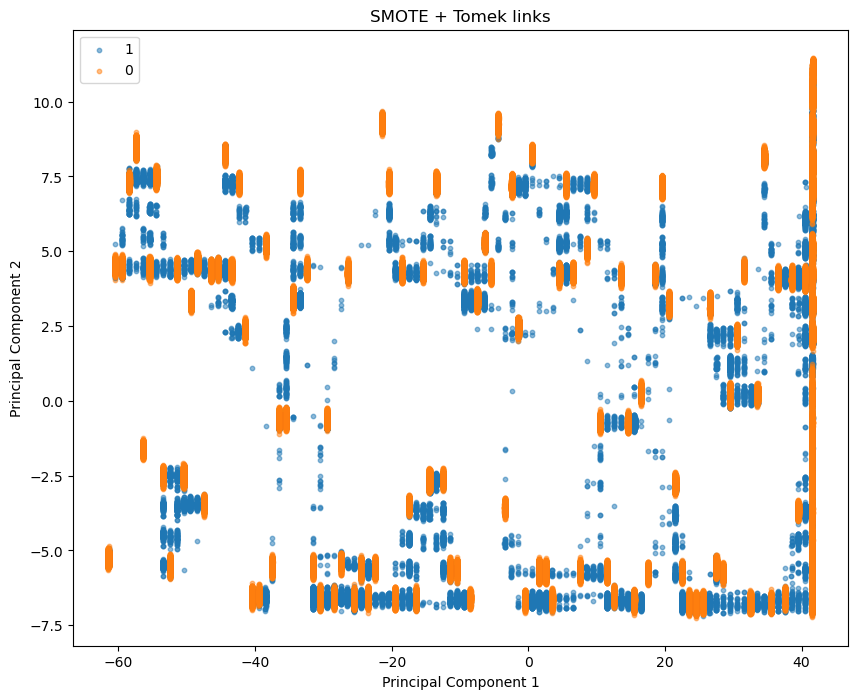

In [10]:
# 对训练集进行SMOTE重采样
smt = SMOTETomek(sampling_strategy=0.5)
X_train_smt, y_train_smt = smt.fit_resample(X_train, y_train)

# 检查重采样后的分布
print("\n重采样后的训练集类别分布:")
print(pd.Series(y_train_smt).value_counts())
print("最终训练集形状:", X_train_smt.shape)
print("最终测试集形状:", X_test.shape)

# PCA降维可视化
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train_smt)
X_test_2d = pca.transform(X_test)

def plot_2d_space(X, y, label='Classes'):   
   plt.figure(figsize=(10, 8))
   for i in [1,0]:
       plt.scatter(
           X[y==i, 0], X[y==i, 1],
           alpha=0.5, s=10,
           label=i
       )
   plt.title(label)
   plt.xlabel('Principal Component 1')
   plt.ylabel('Principal Component 2')
   plt.legend()
   plt.show()

# 可视化重采样后的训练集
plot_2d_space(X_train_2d, y_train_smt, 'SMOTE + Tomek links')

## Model Construction - XGBoost

In [12]:
# 导入包
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

# XGBoost参数网格
params = {
    'min_child_weight': [1, 5, 10],
    'gamma': [0.5, 1, 1.5, 2, 5],
    'subsample': [0.6, 0.7, 0.8], 
    'colsample_bytree': [0.6, 0.8, 1.0],
    'max_depth': [3, 4, 5]
}

# 初始化XGBoost
xgb = XGBClassifier(
    learning_rate=0.02,
    n_estimators=600,
    objective='binary:logistic',
    silent=True,
    nthread=1
)

folds = 5
param_comb = 20
skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=42)

# 随机搜索
random_search = RandomizedSearchCV(
    xgb,
    param_distributions=params,
    n_iter=param_comb,
    scoring='roc_auc',  # XGBoost直接支持'roc_auc'
    n_jobs=4,
    cv=skf.split(X_train_smt, y_train_smt),
    verbose=3,
    random_state=42
)

print("开始随机搜索最佳参数...")
random_search.fit(X_train_smt, y_train_smt)

print('\n最佳参数:')
print(random_search.best_params_)
print('\n最佳AUC分数:')
print(random_search.best_score_)

# 测试集预测
y_pred = random_search.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, y_pred)
print('测试集AUC分数:', test_auc)

# 处理并预测最终测试数据
test_processed = test.drop(['id'], axis=1)
for col in cat_features:
    test_processed[col] = encoders[col].transform(test_processed[col])
test_processed[num_features] = scaler.transform(test_processed[num_features])

test_predictions = random_search.predict(test_processed)

# 生成提交文件
submission = pd.DataFrame({
    'id': test['id'],
    'target': test_predictions
})

开始随机搜索最佳参数...
Fitting 5 folds for each of 20 candidates, totalling 100 fits

最佳参数:
{'subsample': 0.8, 'min_child_weight': 5, 'max_depth': 5, 'gamma': 1.5, 'colsample_bytree': 0.6}

最佳AUC分数:
0.9702247232857182
测试集AUC分数: 0.6044840716464718
